In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

from pathlib import Path

import motorlab as ml
import yaml

In [3]:
os.chdir(Path().resolve().parent)

In [28]:
for area in ["m1", "pmd"]:
    experiment = "gbyk"
    sessions = ml.config.gbyk_sessions
    config = ml.config.get_default_config(experiment, sessions)
    config["CHECKPOINT_DIR"] = "checkpoint/pose_and_spike_count_to_position"
    config["CONFIG_DIR"] = "config/pose_and_spike_count_to_position"
    config["in_modalities"] = "poses_spike_count"
    config["out_modalities"] = "position"

    config["intervals"]["include_homing"] = True
    config["spikes"]["brain_area"] = area
    config["model"]["embedding_dim"] = 64
    config["model"]["hidden_dim"] = 256
    config["model"]["n_layers"] = 1

    ml.model.train(config)

FCModel(
  (embedding): LinearEmbedding(
    (linear): ModuleDict(
      (bex_20230621_spikes_sorted_SES): Linear(in_features=134, out_features=64, bias=True)
      (bex_20230624_spikes_sorted_SES): Linear(in_features=135, out_features=64, bias=True)
      (bex_20230629_spikes_sorted_SES): Linear(in_features=132, out_features=64, bias=True)
      (bex_20230630_spikes_sorted_SES): Linear(in_features=134, out_features=64, bias=True)
      (bex_20230701_spikes_sorted_SES): Linear(in_features=134, out_features=64, bias=True)
      (bex_20230708_spikes_sorted_SES): Linear(in_features=128, out_features=64, bias=True)
      (ken_20230618_spikes_sorted_SES): Linear(in_features=158, out_features=64, bias=True)
      (ken_20230622_spikes_sorted_SES): Linear(in_features=145, out_features=64, bias=True)
      (ken_20230629_spikes_sorted_SES): Linear(in_features=149, out_features=64, bias=True)
      (ken_20230630_spikes_sorted_SES): Linear(in_features=150, out_features=64, bias=True)
      (ken_20

In [ ]:
run = 20250711111003  # m1
run = 20250711113101  # pmd
run = 20250711103738  # all

In [ ]:
CONFIG_DIR = Path(get_config()["CONFIG_DIR"])
CONFIG_PATH = CONFIG_DIR / f"{run}.yml"

with open(CONFIG_PATH, "r") as f:
    config = yaml.safe_load(f)

# config["include_trial"] = True
# config["include_homing"] = False

# config["include_trial"] = False
# config["include_homing"] = True

# config["load_epoch"] = 75

eval_metrics, eval_gts, eval_preds = ml.model.evaluate(config)

for session in eval_preds:
    eval_gts[session] = eval_gts[session].reshape(-1, 2)
    eval_preds[session] = eval_preds[session].reshape(-1, 2)

In [ ]:
ml.plot.room_heatmap(eval_gts, eval_preds)

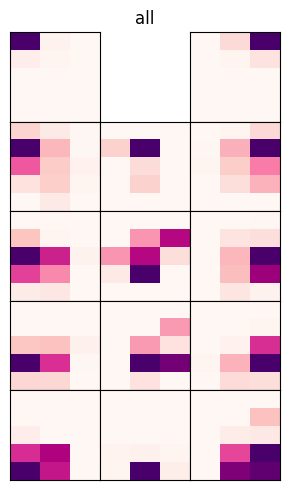

In [ ]:
bex_gts = {
    session: gts for session, gts in eval_gts.items() if "bex" in session
}
bex_preds = {
    session: preds for session, preds in eval_preds.items() if "bex" in session
}
ml.plot.room_heatmap(bex_gts, bex_preds, concat=True)

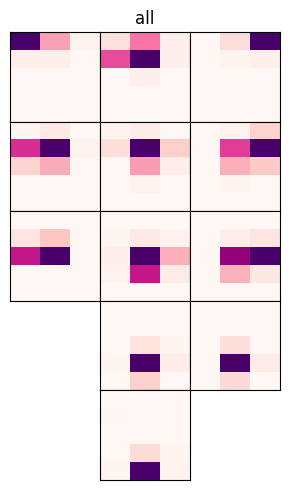

In [ ]:
ken_gts = {
    session: gts for session, gts in eval_gts.items() if "ken" in session
}
ken_preds = {
    session: preds for session, preds in eval_preds.items() if "ken" in session
}
ml.plot.room_heatmap(ken_gts, ken_preds, concat=True)